# Millennium Simulation Data Consistency Check: Overlaying Foreground galaxies on Ray-traced Shear and Convergence Maps

We must make sure that our galaxy/halo catalogs are read in correctly before we try and use them. In this demo we make plots of the ray-traced convergence and shear fields, and then overlay the associated foreground galaxies, sized by their stellar mass.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

/home/spencer/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
import pangloss

In [4]:
K = pangloss.Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

In [5]:
S = pangloss.Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

In [6]:
config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

['/home/spencer/Documents/Pangloss/calib/Millennium/catalog_example.txt']
['/home/spencer/Documents/Pangloss/calib/Millennium/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa.fits']


In [7]:
B = pangloss.BackgroundCatalog(sigma_e=0.5) # High ellipticity used to highlight the intrinsic shape of background sources

Now we have all the data we need, let's plot the maps and overlay the galaxies - first on the whole catalog, and then in a zoomed-in view.

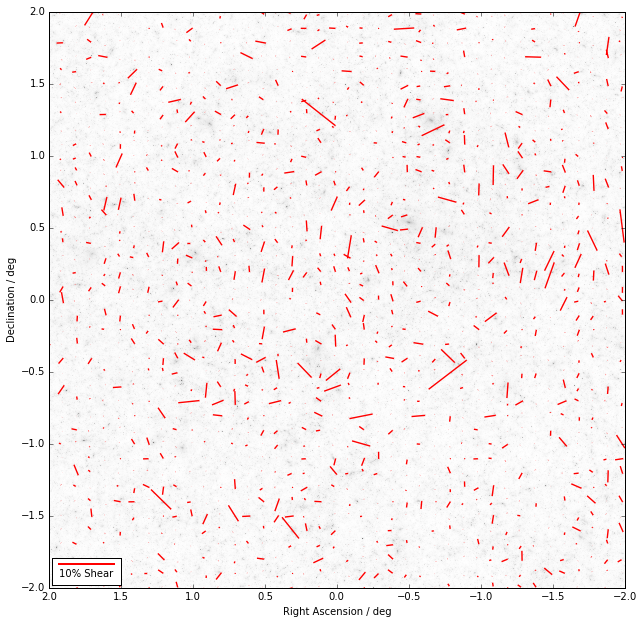

In [8]:
K.plot()
S.plot()

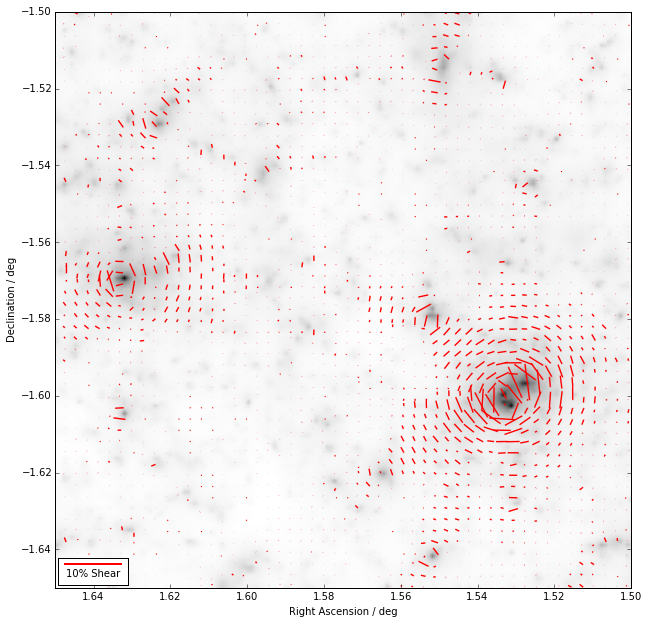

In [9]:
# Now works with subplots
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.5])

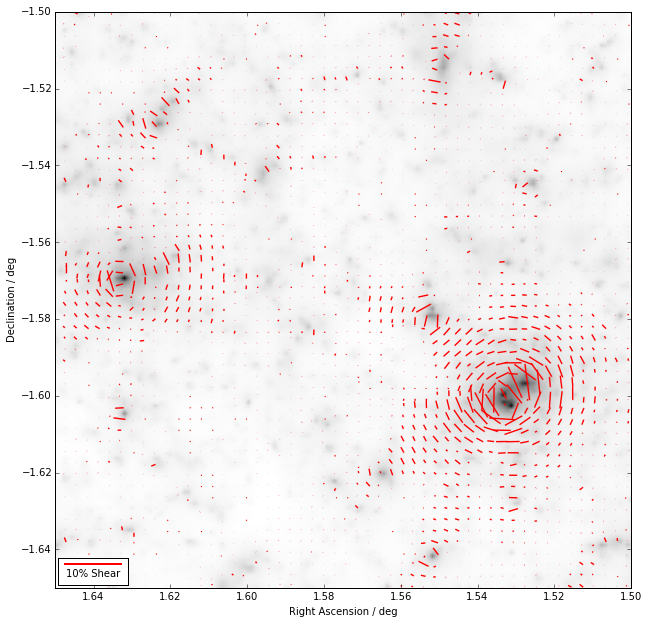

In [10]:
# The shearmap can also figure out the subplot from Kappamap if nothing is passed!
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot()

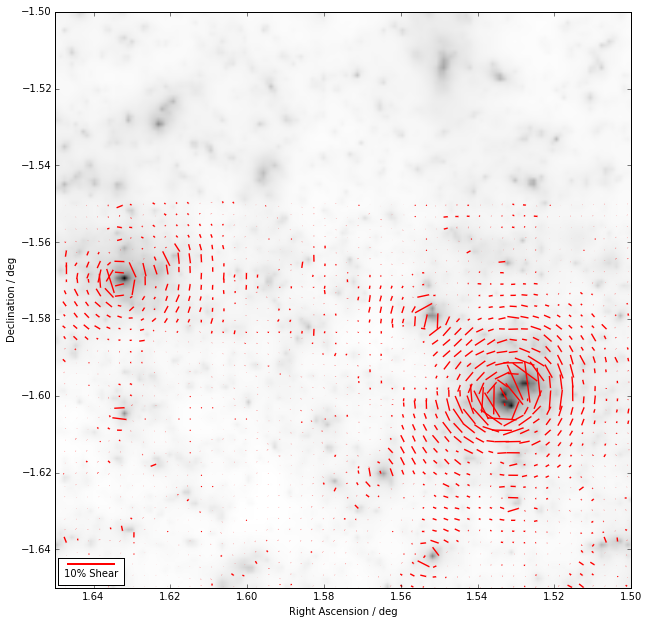

In [11]:
# If different subplots are passed, the Kappamap subplot is viewed and the overlapping shear sticks are plotted.
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.55])

Now adding catalogs:

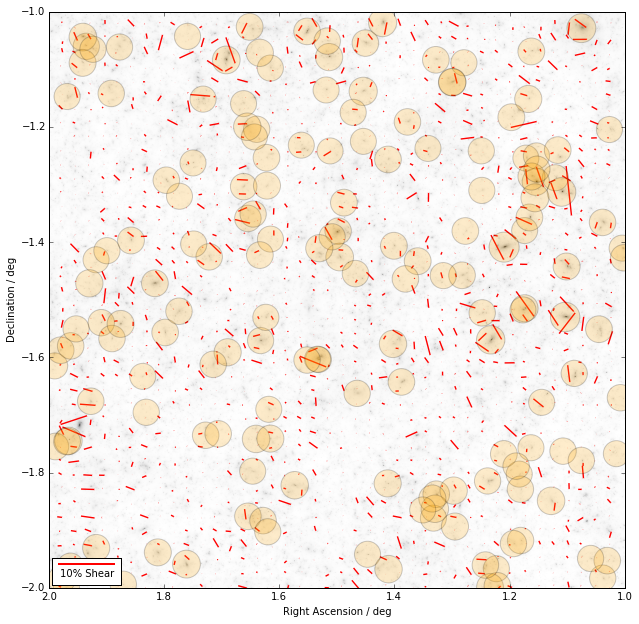

In [12]:
# Whole (0,0) field:
K.plot(subplot=[2,1,-2,-1])
S.plot()
F.plot(mass_lim=[10**11,10**12])

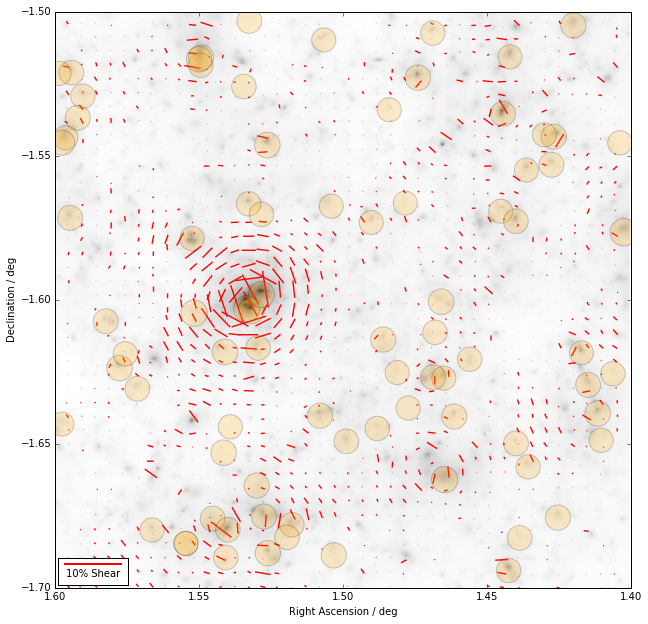

In [13]:
# Zoomed in:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.7,10**12])

However, `ForegroundCatalog` instances can plot themselves without any maps:

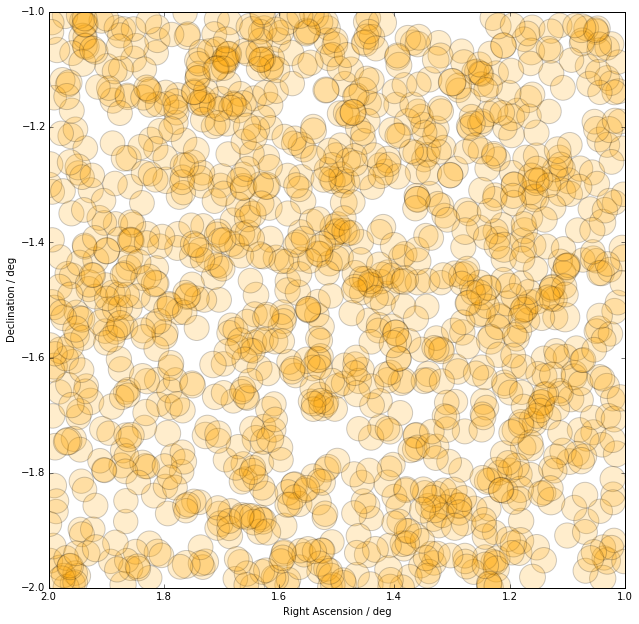

In [14]:
F.plot(mass_lim=[10**10.75,10**12])

We can also add a generated background catalog of galaxies to the overlays:

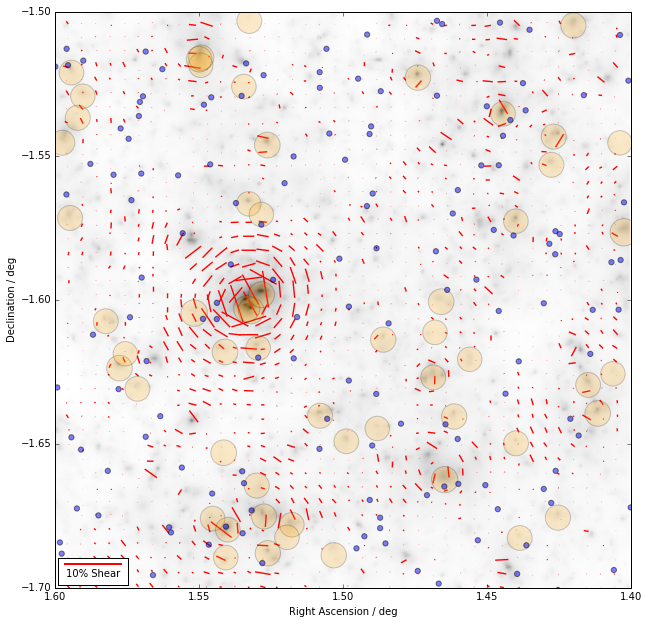

In [15]:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**11.95,10**12])

The background galaxies by default plot as points as there are so numerous (notice the very small mass range allowed in the previous plot). However, they can also be plotted as ellipses to show their intrinsic shape using the optional parameter `graph='ellipse'`. The foreground and background galaxies use the same mass scaling for plotting.

/home/spencer/Documents/Pangloss/pangloss/plotting.py:139: RuntimeWarning: invalid value encountered in sqrt
  ellipse = Ellipse(xy=[ra,dec],width=size,height=np.sqrt(q)*size,angle=phi)


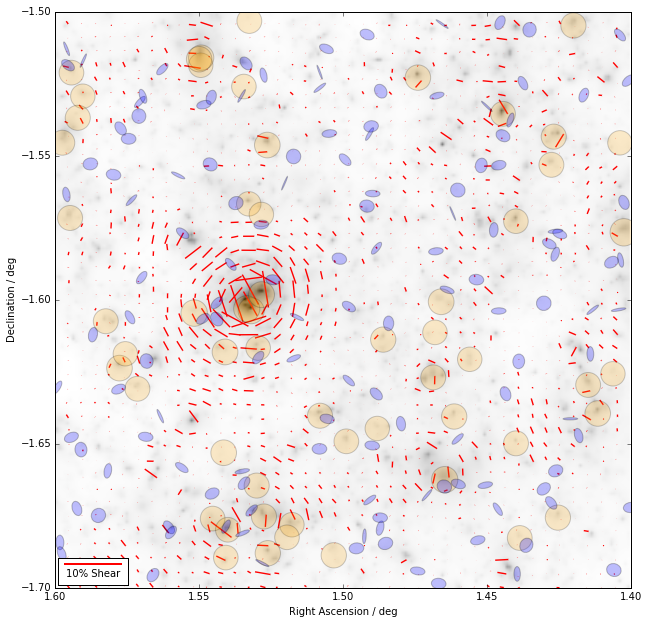

In [16]:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**11.95,10**12],graph='ellipse',lensed='none')

Sometimes it is more convenient to plot the background sources as ellipticity sticks. To do this, simply change the `graph` argument to `stick`. Each ellipticity stick is centered at the location of the source galaxy and has length proportional to the modulus of the ellipticity.

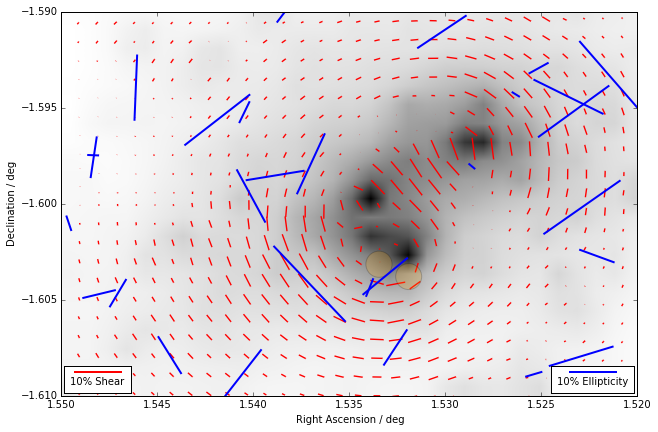

In [17]:
s =[1.55,1.52,-1.61,-1.59] # New, smaller subplot
B = pangloss.BackgroundCatalog(N=15,domain=s,field=[0,0,0,0],sigma_e=0.1) # Using smaller ellipticities now
K.plot(subplot=s)
S.plot()
F.plot(mass_lim=[10**11,10**12])
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='none')

Like foreground catalogs, a background catalog can also plot itself when no maps are present.

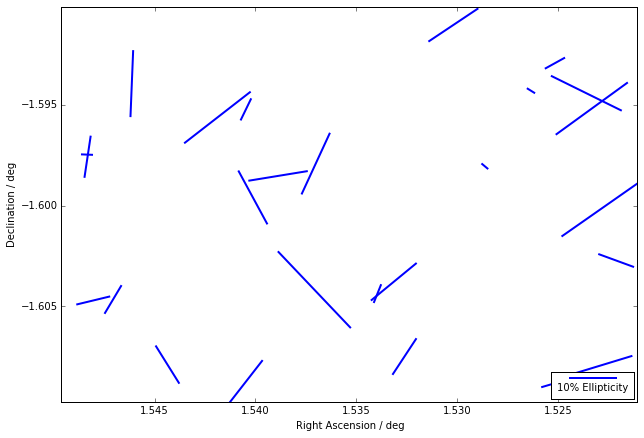

In [18]:
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='none')

(Add lensing and noise part!!)

In [19]:
B.lens_by_map(K,S)
B.add_noise()